In [912]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
set_config(display='diagram')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from math import sqrt

# Predecir la perdida o cancelacion de Tarjeta de Credito por parte de un cliente.



A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.



### Traducido:

Un gerente del banco está molesto porque cada vez más clientes abandonan sus servicios de tarjeta de crédito. Realmente apreciarían si se pudiera predecir quién va a ser expulsado para que puedan acudir de manera proactiva al cliente para brindarle mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta. 

Debemos buscar un modelo para resolver este problema comercial en particular.

Ahora, este conjunto de datos consta de 10,000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. Hay casi 18 características.

Solo tenemos un 16,07% de clientes que se han marchado. Por lo tanto, es un poco difícil entrenar nuestro modelo para predecir la rotación de clientes.


### Diccionario 

#### Revolving Balance 

¿Qué es un balance rotativo? ¿BALANCE? Con el crédito renovable, un consumidor tiene una línea de crédito que puede seguir usando y pagando una y otra vez. El saldo que se transfiere de un mes al siguiente es el saldo renovable de ese préstamo.




In [913]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [914]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [915]:
df.drop(df.columns[[16,19,21,22,]], axis=1, inplace=True)

In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [917]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [918]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [919]:
df['Attrition_Flag'].replace({'Existing Customer':'Cliente Activo','Attrited Customer':'Cliente Retirado'}, inplace=True)
df['Attrition_Flag'].value_counts()

Cliente Activo      8500
Cliente Retirado    1627
Name: Attrition_Flag, dtype: int64

In [920]:
df['Attrition_Flag'].value_counts().sum()

10127

In [921]:
df['Attrition_Flag'].value_counts()/df['Attrition_Flag'].value_counts().sum()

Cliente Activo      0.83934
Cliente Retirado    0.16066
Name: Attrition_Flag, dtype: float64

In [922]:
df.groupby(['Attrition_Flag']).mean().round(1)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,
Cliente Activo,739927217.9,46.3,2.3,35.9,3.9,2.3,2.4,8726.9,1256.6,7470.3,4654.7,68.7,0.3
Cliente Retirado,735261381.3,46.7,2.4,36.2,3.3,2.7,3.0,8136.0,672.8,7463.2,3095.0,44.9,0.2


In [923]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [924]:
df.groupby(['Attrition_Flag']).describe().round(1)

CLIENTNUM                                                     \
                     count         mean         std          min          25%   
Attrition_Flag                                                                  
Cliente Activo      8500.0  739927217.9  37107226.5  708082083.0  713219658.0   
Cliente Retirado    1627.0  735261381.3  35577253.4  708083283.0  712371258.0   

                                                        Customer_Age        \
                          50%          75%          max        count  mean   
Attrition_Flag                                                               
Cliente Activo    718164333.0  778341539.2  828343083.0       8500.0  46.3   
Cliente Retirado  716564433.0  768373683.0  828294933.0       1627.0  46.7   

                  ... Total_Trans_Ct        Avg_Utilization_Ratio            \
                  ...            75%    max                 count mean  std   
Attrition_Flag    ...                                                         
Cliente Activo    ...           82.0  139.0                8500.0  0.3  0.3   
Cliente Retirado  ...           51.0   94.0                1627.0  0.2  0.3   

                                           
                  min  25%  50%  75%  max  
Attrition_Flag                             
Cliente Activo    0.0  0.1  0.2  0.5  1.0  
Cliente Retirado  0.0  0.0  0.0  0.2  1.0  

[2 rows x 104 columns]

In [925]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Trans_Amt              5033
Total_Trans_Ct                126
Avg_Utilization_Ratio         964
dtype: int64

In [926]:
df['Total_Trans_Ct'].unique()

array([ 42,  33,  20,  28,  24,  31,  36,  32,  26,  17,  29,  27,  21,
        30,  16,  18,  23,  22,  40,  38,  25,  43,  37,  19,  35,  15,
        41,  57,  12,  14,  34,  44,  13,  47,  10,  39,  53,  50,  52,
        48,  49,  45,  11,  55,  46,  54,  60,  51,  63,  58,  59,  61,
        78,  64,  65,  62,  67,  66,  56,  69,  71,  75,  74,  76,  84,
        82,  88,  68,  70,  73,  86,  72,  79,  80,  85,  81,  87,  83,
        91,  89,  77, 103,  93,  96,  99,  92,  90,  94,  95,  98, 100,
       102,  97, 101, 104, 105, 106, 107, 109, 118, 108, 122, 113, 112,
       111, 127, 114, 124, 110, 120, 125, 121, 117, 126, 134, 116, 119,
       129, 131, 115, 128, 139, 123, 130, 138, 132])

In [927]:
df['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1])

In [928]:
df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5])

In [929]:
df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5])

In [930]:
df[df.Attrition_Flag == 'Cliente Retirado'].Months_Inactive_12_mon.mean()

2.693300553165335

In [933]:
df['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14])

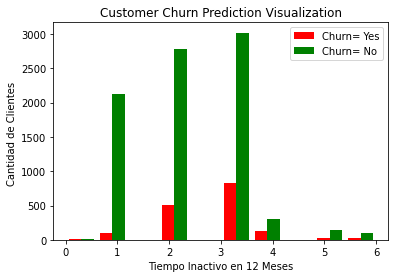

In [934]:
tiempo_churn_no = df[df.Attrition_Flag == 'Cliente Activo'].Months_Inactive_12_mon
tiempo_churn_yes = df[df.Attrition_Flag =='Cliente Retirado'].Months_Inactive_12_mon

plt.xlabel('Tiempo Inactivo en 12 Meses')
plt.ylabel('Cantidad de Clientes ')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tiempo_churn_yes,tiempo_churn_no],color =['red','green'], label=['Churn= Yes','Churn= No'])
plt.legend()

Text(0.5, 1.0, 'Meses de contacto y los que salieron o no')

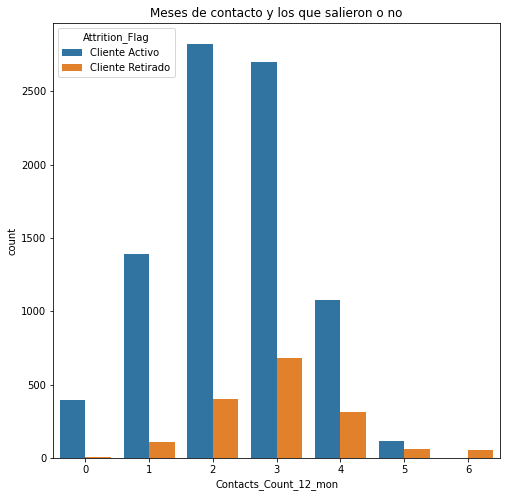

In [935]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Contacts_Count_12_mon', hue='Attrition_Flag' , data=df)
plt.title('Meses de contacto y los que salieron o no')

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Total_Trans_Ct'>

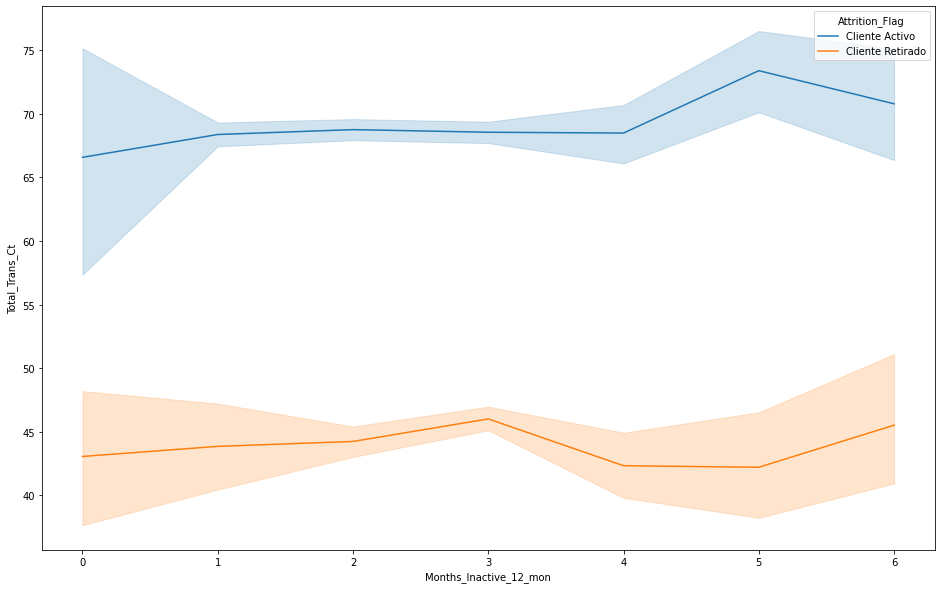

In [936]:
plt.figure(figsize = (16,10))
sns.lineplot(x ='Months_Inactive_12_mon', y = 'Total_Trans_Ct', hue = 'Attrition_Flag', data = df)

Text(0.5, 1.0, 'Tipo de Tarjeta con el Churn')

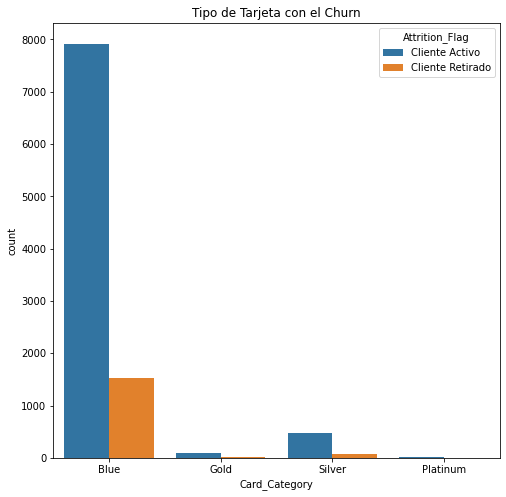

In [937]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Card_Category', hue='Attrition_Flag' , data=df)
plt.title('Tipo de Tarjeta con el Churn')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

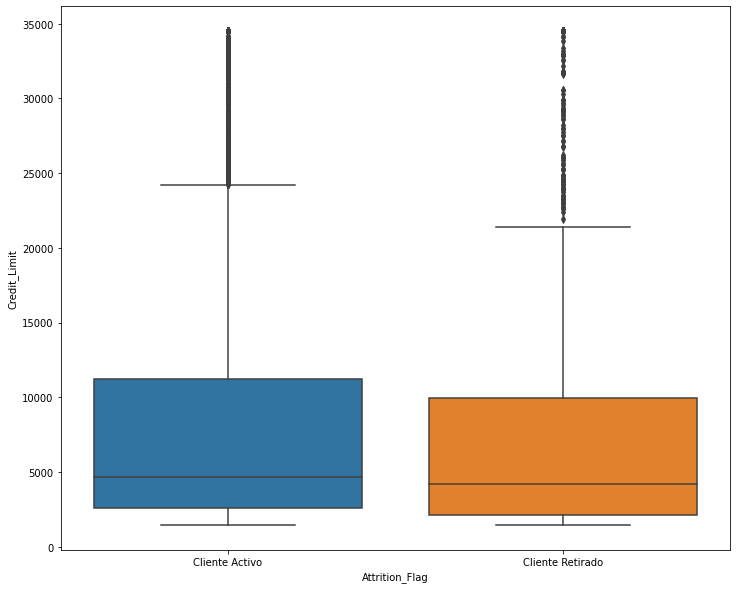

In [938]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Credit_Limit', x = 'Attrition_Flag', data = df)

Text(0.5, 1.0, 'Nivel de educacion con el Churn')

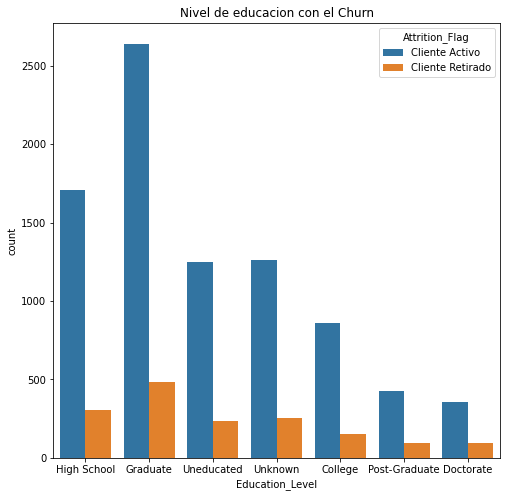

In [939]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Education_Level', hue='Attrition_Flag' , data=df)
plt.title('Nivel de educacion con el Churn')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

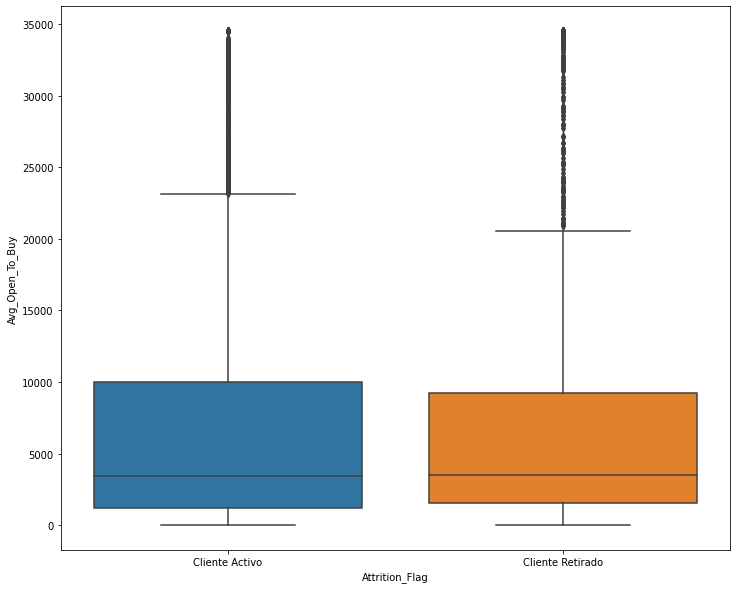

In [940]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Avg_Open_To_Buy', x = 'Attrition_Flag', data = df)

Text(0.5, 1.0, 'Tipo de Tarjeta con el Churn')

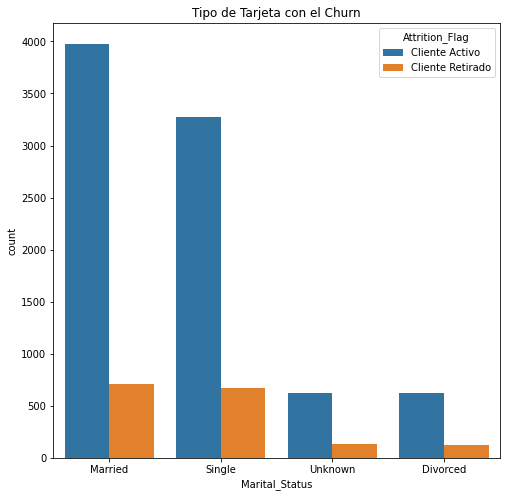

In [941]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Marital_Status', hue='Attrition_Flag' , data=df)
plt.title('Tipo de Tarjeta con el Churn')

Text(0.5, 1.0, 'Genero con el Churn')

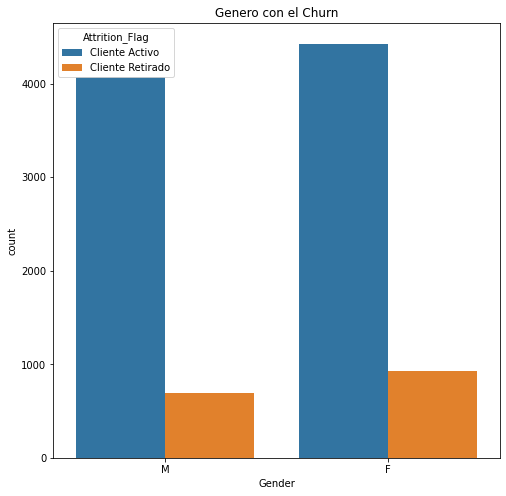

In [942]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Gender', hue='Attrition_Flag' , data=df)
plt.title('Genero con el Churn')

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Density'>

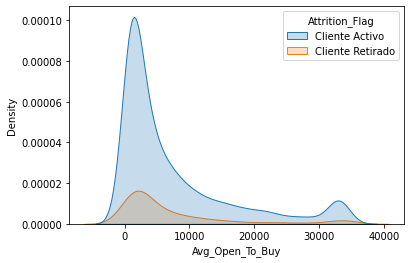

In [943]:
sns.kdeplot(x = 'Avg_Open_To_Buy',hue = 'Attrition_Flag', shade = True, data= df,)

In [944]:
df['Attrition_Flag'].replace({'Cliente Activo':0,'Cliente Retirado':1}, inplace=True)
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

<AxesSubplot:>

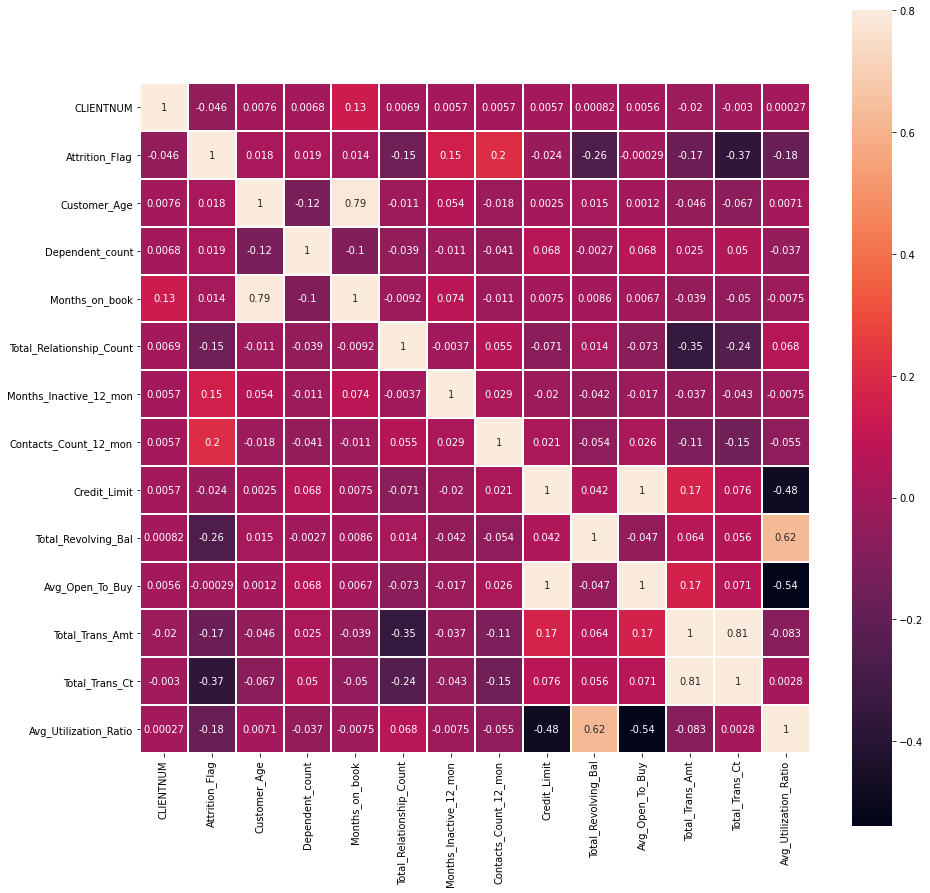

In [945]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

## Correlacion basado solamente en el Churn de los clientes de TC

<AxesSubplot:>

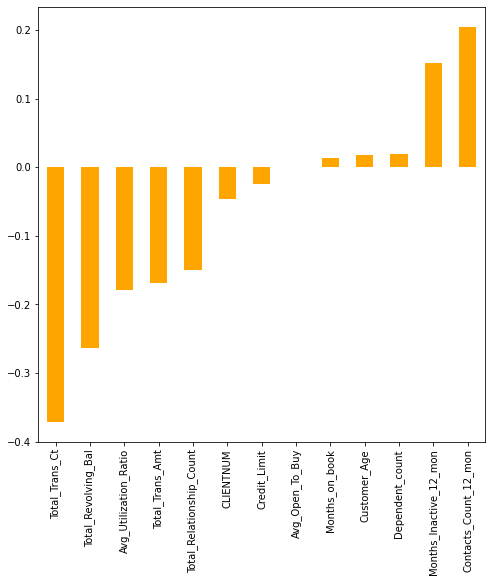

In [946]:
df.corr()['Attrition_Flag'].drop('Attrition_Flag').sort_values().plot(kind='bar',figsize=(8, 8), color='orange')

In [947]:
df_numerical=df.select_dtypes(exclude='object')
df_numerical.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,1887,20,0.000


Text(0.5, 1.0, 'Ingresos con relacion al churn')

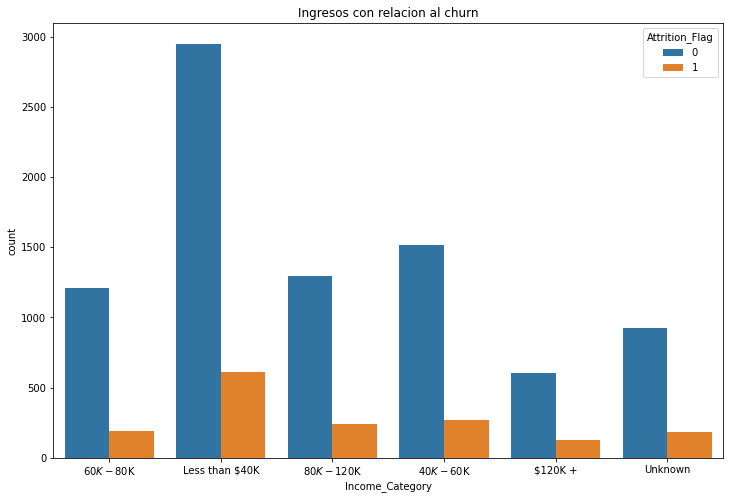

In [948]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Income_Category', hue='Attrition_Flag' , data=df)
plt.title('Ingresos con relacion al churn')

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Open_To_Buy'>

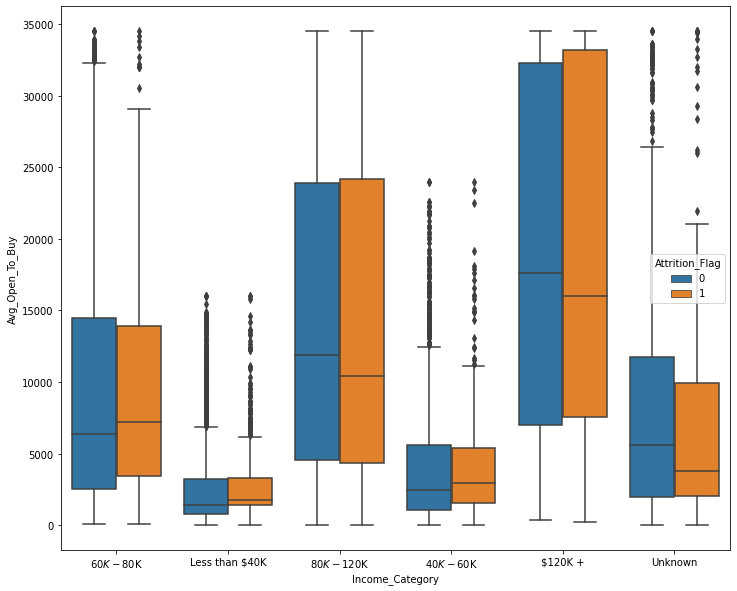

In [949]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Avg_Open_To_Buy', x = 'Income_Category', hue = 'Attrition_Flag', data = df)

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

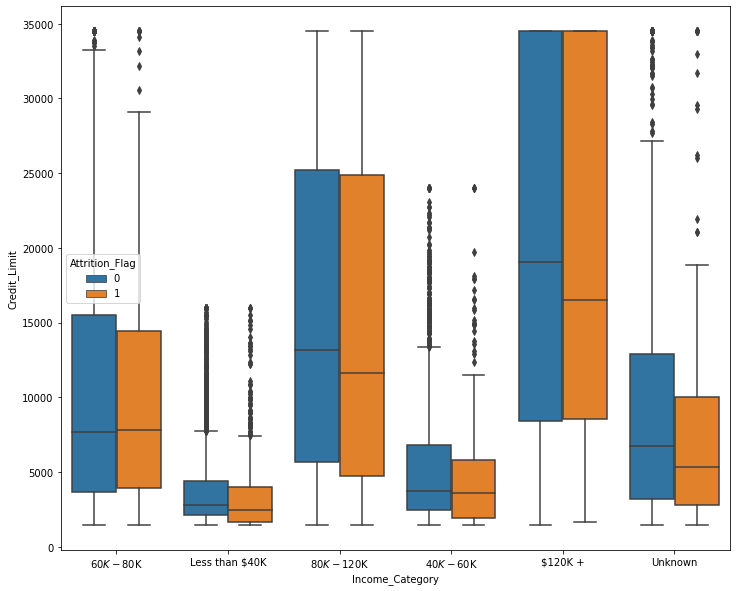

In [950]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Credit_Limit', x = 'Income_Category', hue = 'Attrition_Flag', data = df)

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Customer_Age'>

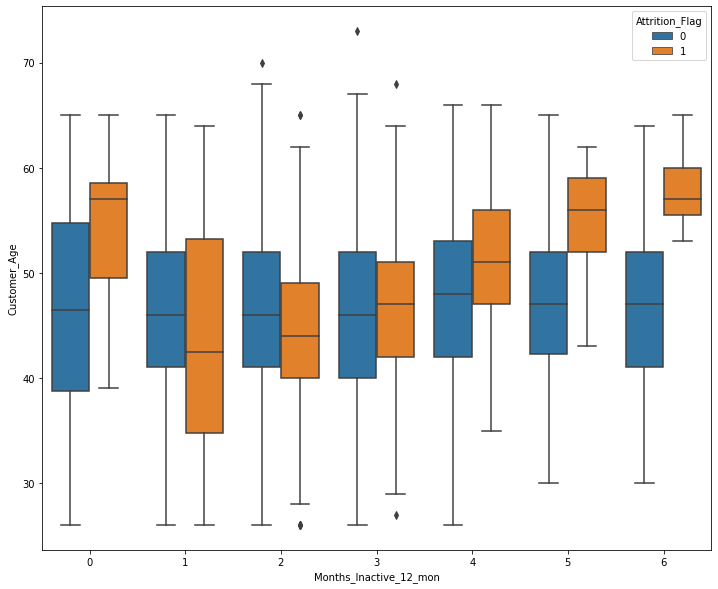

In [951]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Customer_Age', x = 'Months_Inactive_12_mon', hue = 'Attrition_Flag', data = df)

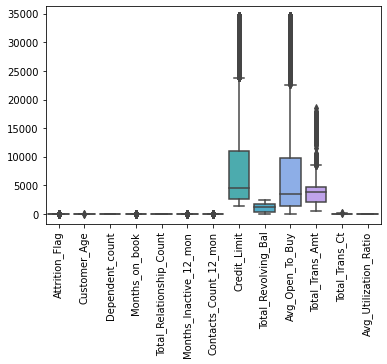

In [952]:
sns.boxplot(data=df.drop(columns=['CLIENTNUM']))
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.show()

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

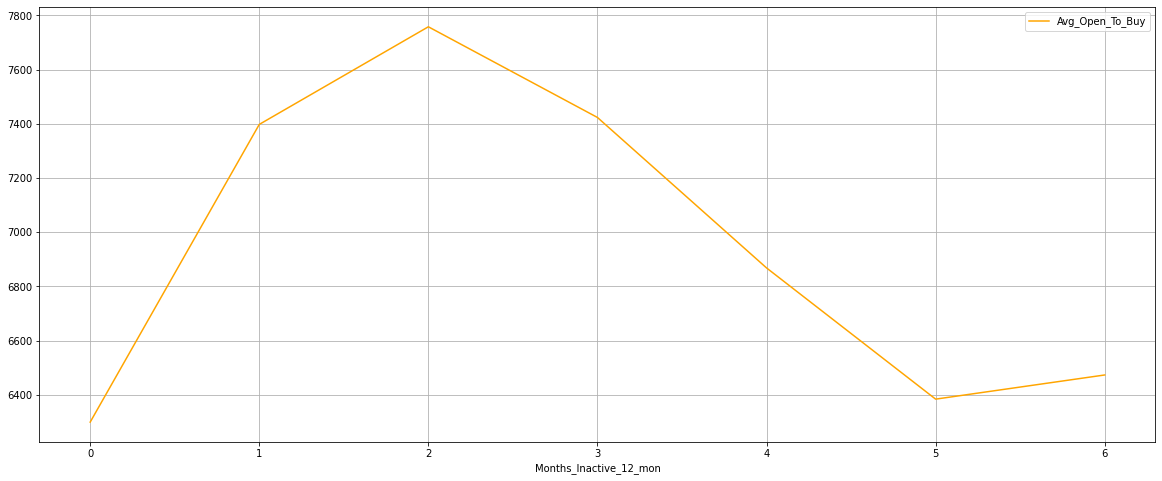

In [953]:
date = df.groupby(["Months_Inactive_12_mon"])[['Avg_Open_To_Buy']].mean()
date.plot(figsize=(20,8),grid = True, color = 'orange')

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

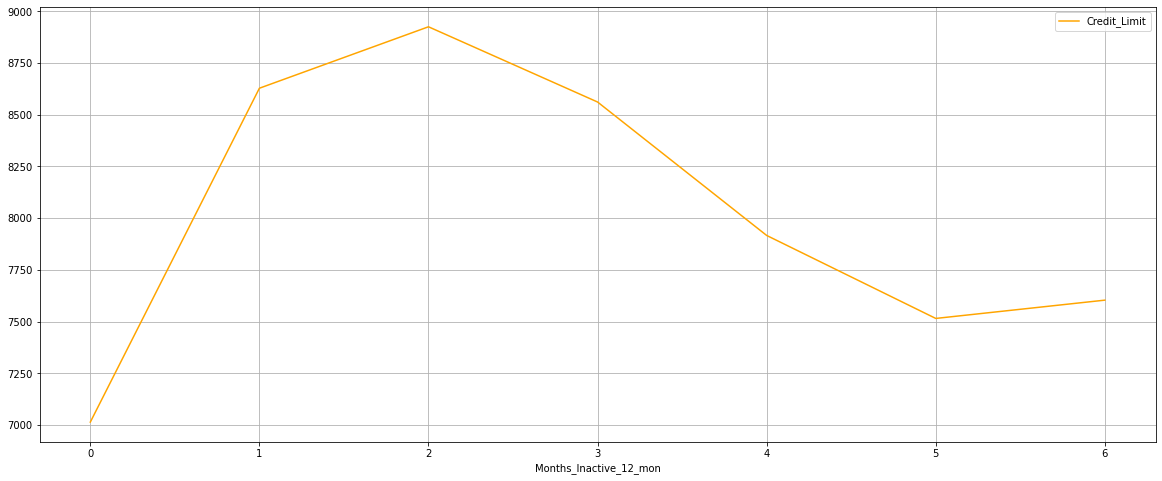

In [954]:
date = df.groupby(["Months_Inactive_12_mon"])[['Credit_Limit']].mean()
date.plot(figsize=(20,8),grid = True, color = 'orange')

<AxesSubplot:xlabel='Total_Trans_Ct'>

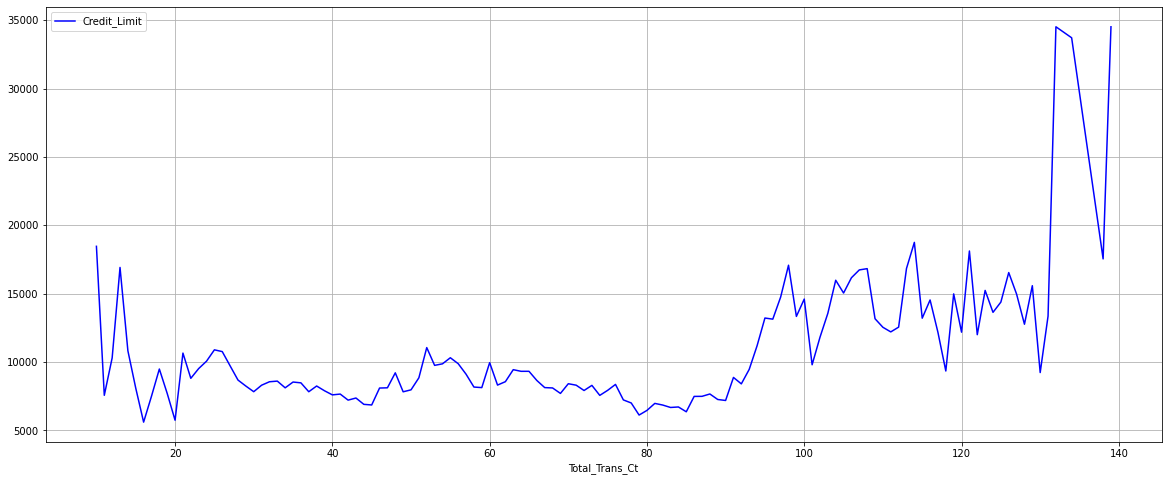

In [955]:
date = df.groupby(["Total_Trans_Ct"])[['Credit_Limit']].mean()
date.plot(figsize=(20,8),grid = True, color = 'blue')

Text(0.5, 1.0, 'Cantidad de Personas que han saldio con el Ingreso Promedio')

<Figure size 1080x1080 with 0 Axes>

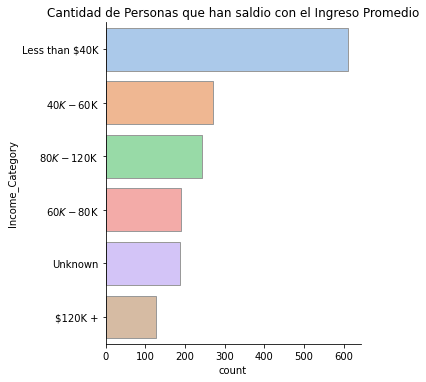

In [956]:
plt.figure(figsize=(15,15))
sns.catplot(data=df[df['Attrition_Flag'] == 1], y ='Income_Category', kind="count",palette="pastel", edgecolor = ".6",order = df.Income_Category.value_counts().index)
plt.title('Cantidad de Personas que han saldio con el Ingreso Promedio')

# Ingenieria de Variables

# Modelo 

In [957]:
# Dividir
X = df.drop(columns=['Attrition_Flag','CLIENTNUM'])
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [958]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [959]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [960]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

# Preprocesamiento Data

In [961]:
### Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [962]:
# Scaler
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [963]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [964]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [965]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fadca70a850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fadca70aeb0>)])

In [966]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fadca70a850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fadca70aeb0>)])

In [967]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [968]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot

print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train.dtype)
print('All data in X_test_processed are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7595, 35)




array([[-0.03615673,  1.29619992,  0.01143375, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08843963, -0.25940384, -0.23774661, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40994584,  2.07400179,  0.26061411, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.53454221,  1.29619992, -0.48692696, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78373495,  0.51839804, -0.98528768, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83601785,  1.29619992,  1.63110608, ...,  0.        ,
         0.        ,  0.        ]])

# Machine Learning 

In [969]:
def cross_val(model):
    accuracies=cross_val_score(estimator = model, X = X_train, y = y_train, cv =10)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cross=cross_val(model)
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

In [970]:
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
    results = fit_evaluate(model)
    result_models= pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

,model,accuracy_train,accuracy_test,precision_score,recall_score,f1_score,roc_auc_score
0,XGBClassifier,95.958082,95.260664,89.445910,80.906921,84.962406,89.506939
0,DecisionTreeClassifier,92.640212,91.824645,75.358852,75.178998,75.268817,85.152206
0,RandomForestClassifier,94.338551,93.917852,91.021672,70.167064,79.245283,84.397304
0,LogisticRegression,89.980202,88.823065,73.776224,50.357995,59.858156,73.404270
0,KNeighborsClassifier,90.032938,89.020537,75.824176,49.403341,59.826590,73.139910


<AxesSubplot:xlabel='model', ylabel='accuracy_train'>

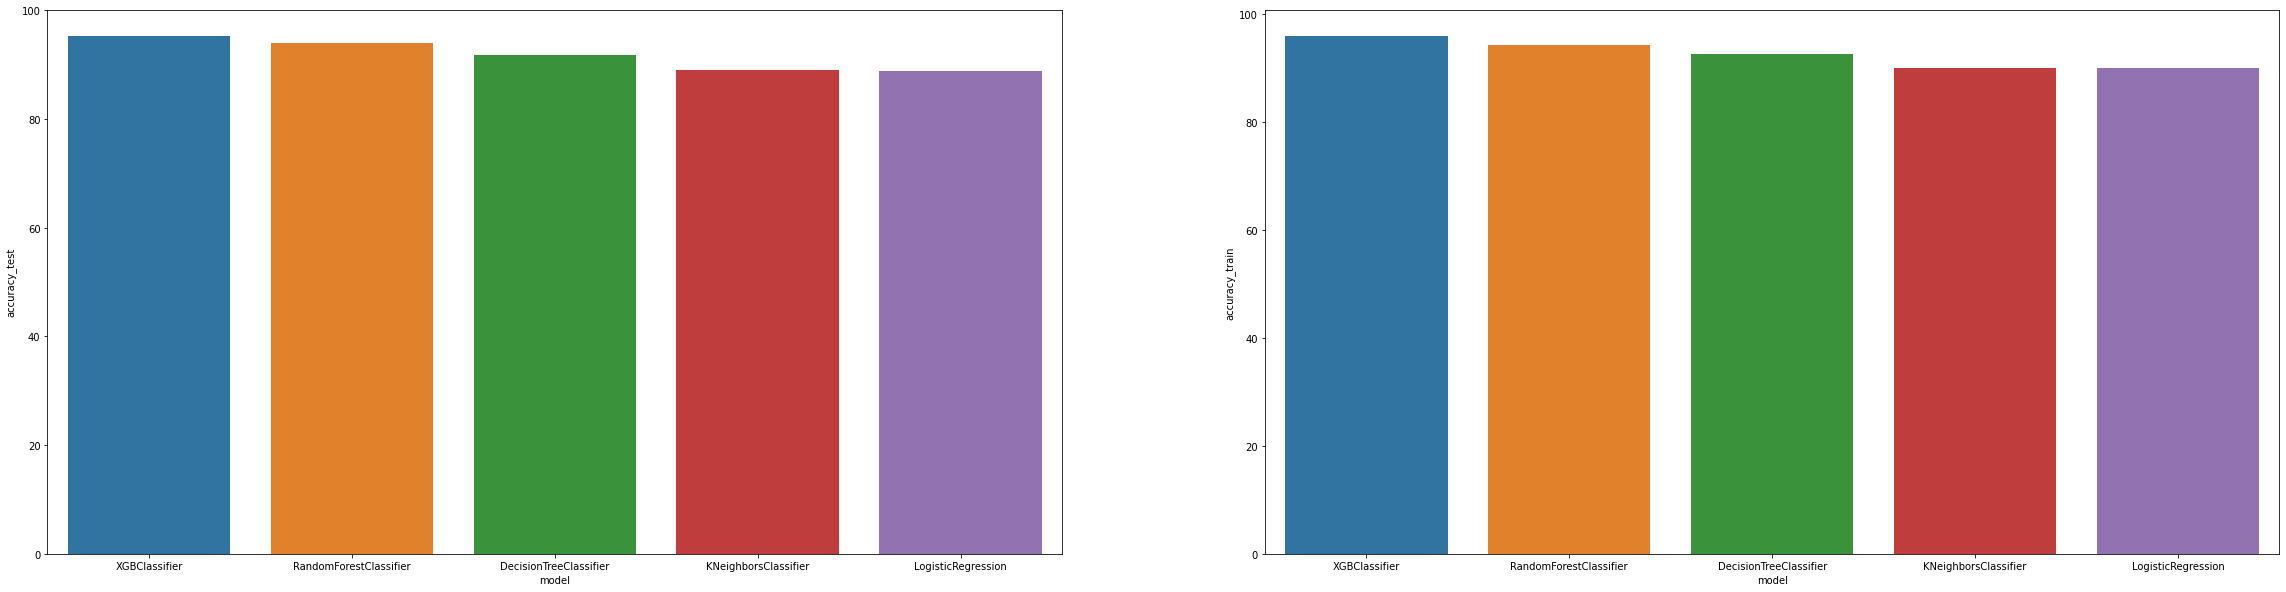

In [971]:
plt.subplots(figsize=(40,10))
plt.subplot(1,2,1)
sns.barplot(y='accuracy_test',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))
plt.subplot(1,2,2)
sns.barplot(y='accuracy_train',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))

In [972]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=accuracy_score(y_test,pred)*100
print(acc)

93.79936808846762


In [973]:
model.feature_importances_

array([0.04427242, 0.0195012 , 0.03508393, 0.06481693, 0.03419259,
       0.03648686, 0.04906777, 0.10823857, 0.04691001, 0.20375334,
       0.18113147, 0.07560965, 0.01120797, 0.00766964, 0.00390422,
       0.00318351, 0.00604355, 0.00515301, 0.00348771, 0.00437041,
       0.00464575, 0.0032592 , 0.00805264, 0.0077568 , 0.00275508,
       0.00246162, 0.0047693 , 0.00388359, 0.00425329, 0.00486631,
       0.00371901, 0.00228128, 0.00096891, 0.0004168 , 0.00182564])

In [974]:
model.feature_importances_.max()

0.20375334405960868

In [975]:
model.feature_importances_.min()

0.00041679878074611475

In [1015]:
dtree = DecisionTreeClassifier(max_depth=5)

In [1016]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

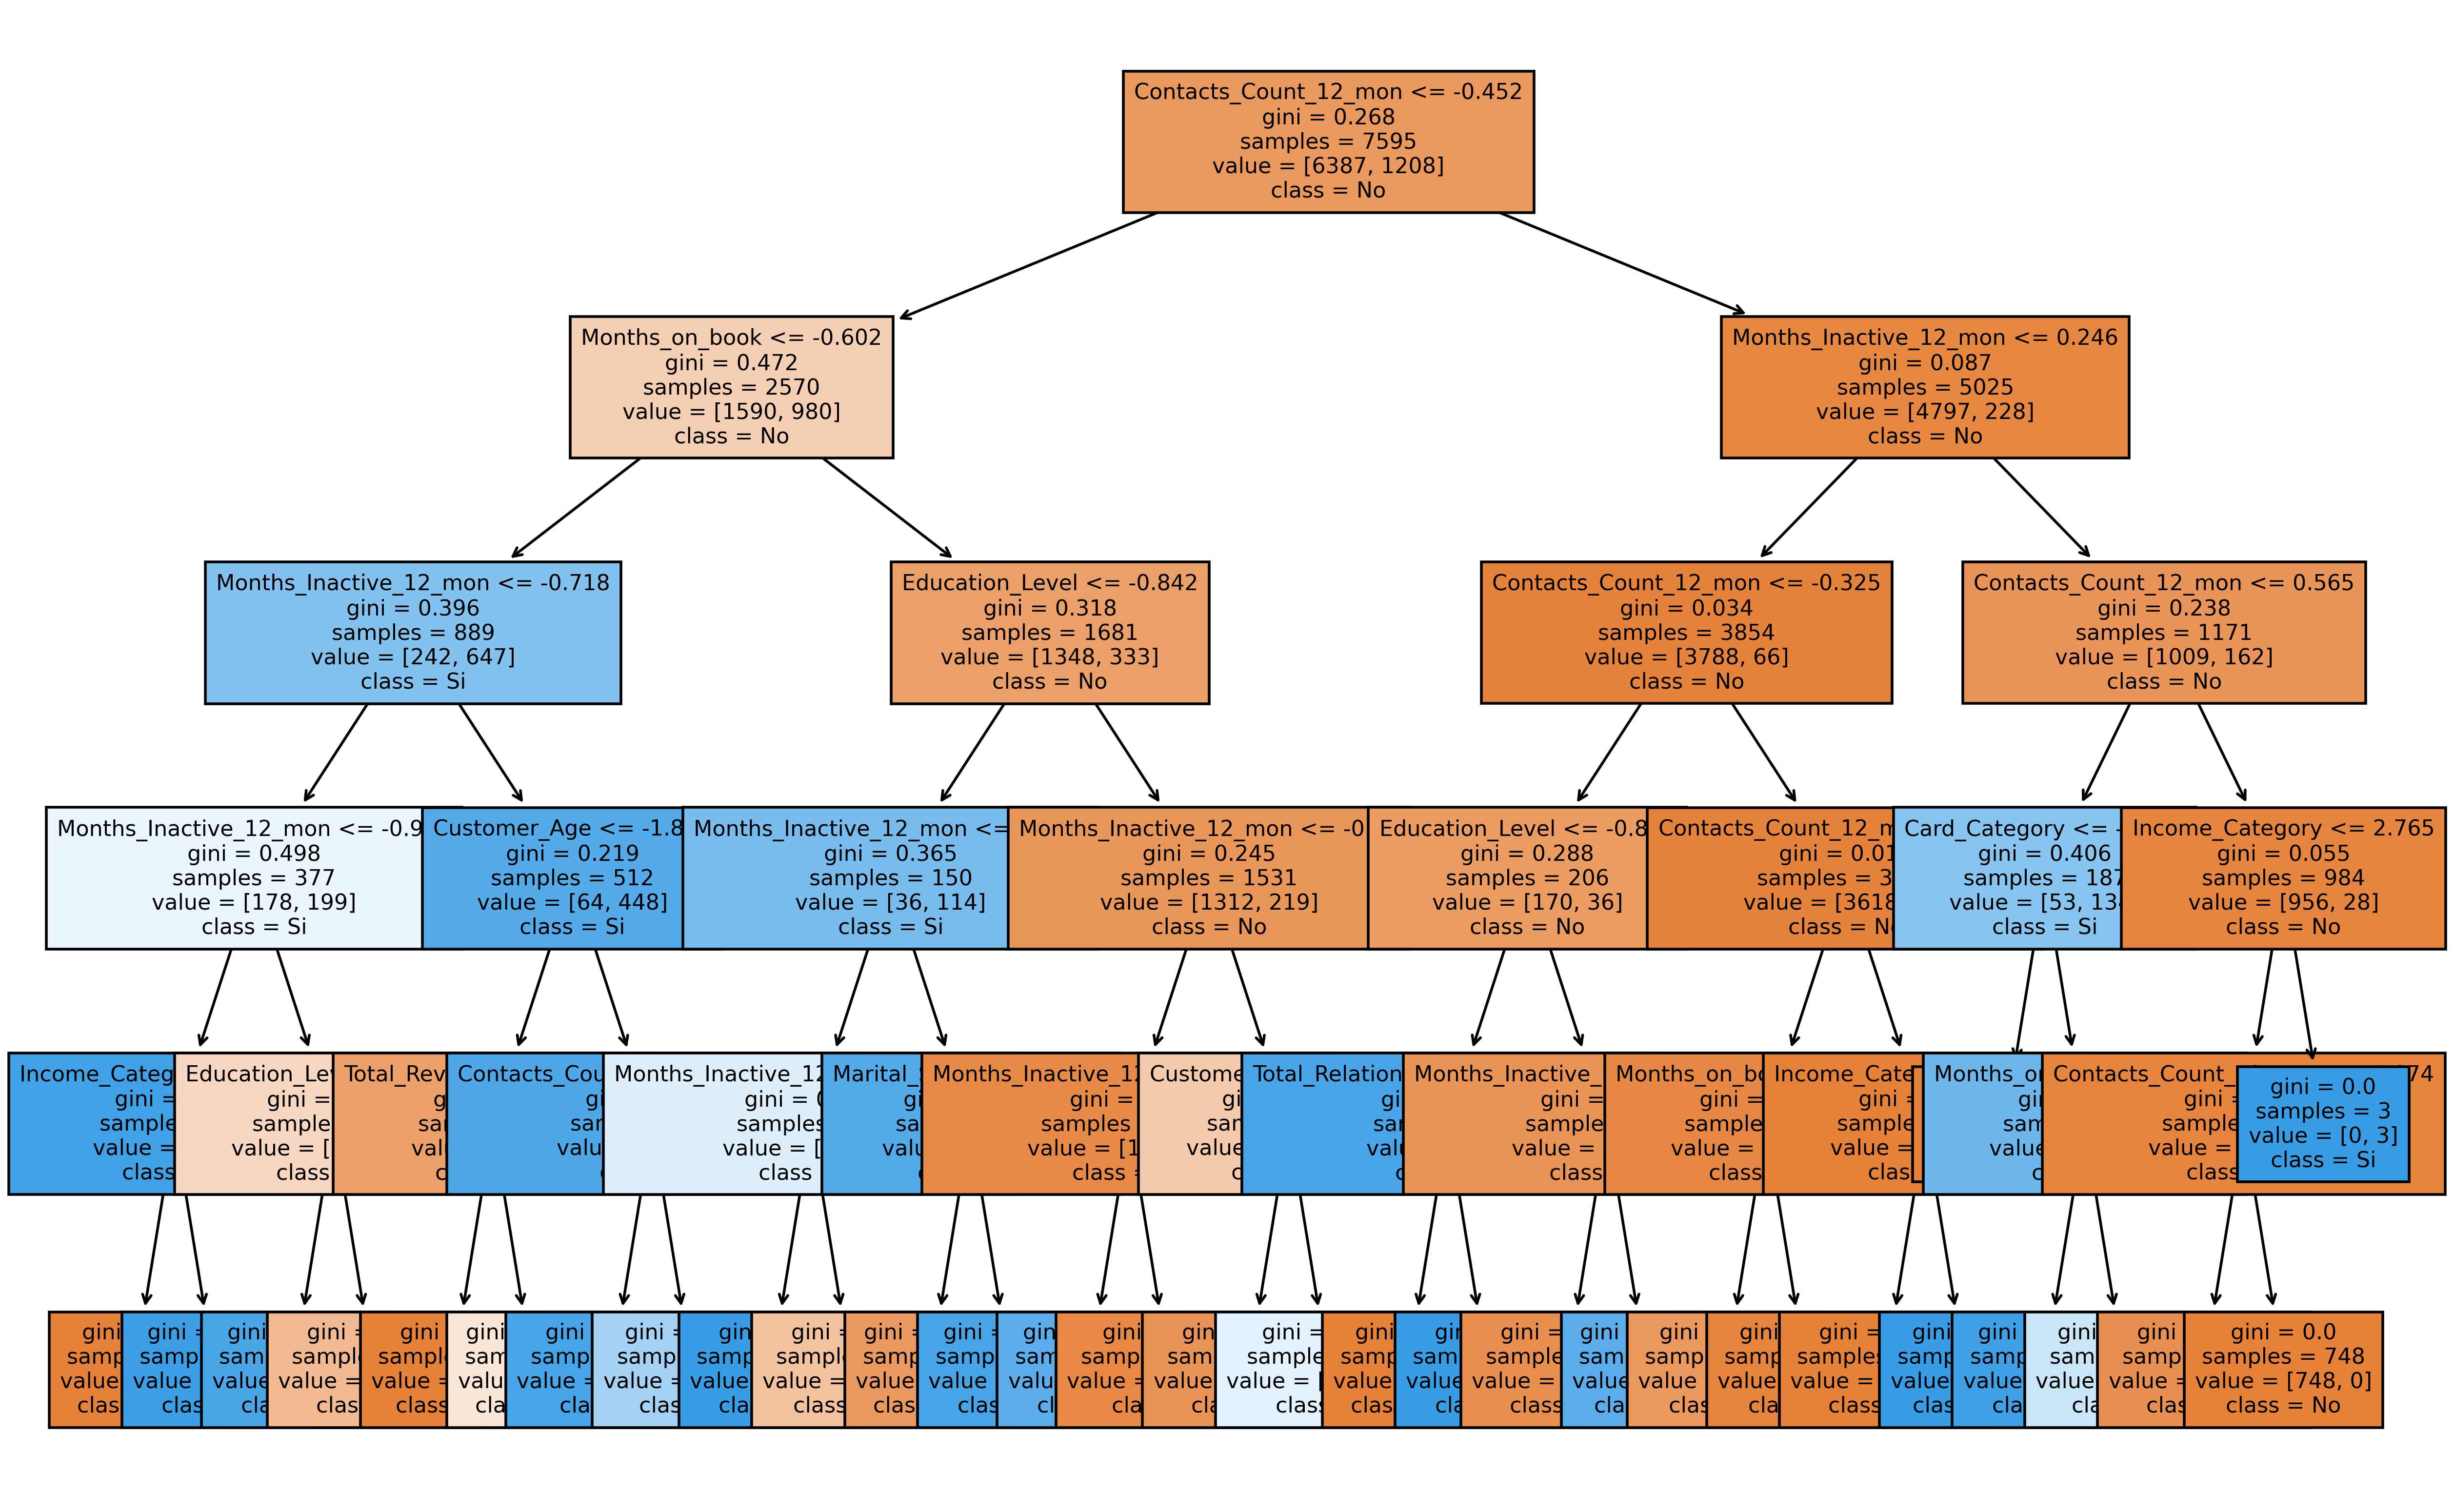

In [1017]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize= (15,10), dpi = 400) 

tree.plot_tree(dtree,
               feature_names = X.columns.tolist(),
               class_names = ['No','Si'],
               filled = True,
               fontsize = 8)
fig.savefig('dtree.png')

In [976]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [977]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.036157,1.296200,0.011434,0.765516,-0.339729,-1.311752,-0.690795,0.210621,-0.710069,-0.051462,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.088440,-0.259404,-0.237747,-0.520503,-0.339729,1.406352,-0.484076,0.493552,-0.528606,-0.744701,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.409946,2.074002,0.260614,-1.163513,0.646603,2.312387,-0.793956,-1.427920,-0.666352,-0.596234,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.659139,-0.259404,-0.985288,-1.806522,-0.339729,0.500317,0.555584,1.360798,0.433866,3.142057,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.285349,1.296200,0.011434,-1.806522,0.646603,-1.311752,1.850914,0.451727,1.811442,2.610144,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,-0.285349,-1.037206,0.260614,-0.520503,-0.339729,2.312387,-0.495872,1.668332,-0.645757,-0.679527,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7591,0.836018,0.518398,0.011434,0.122506,0.646603,3.218422,-0.077252,-1.427920,0.050753,-0.631305,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7592,-0.534542,1.296200,-0.486927,-0.520503,-1.326061,-0.405718,-0.697410,0.475100,-0.740405,0.072748,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7593,-0.783735,0.518398,-0.985288,0.122506,-1.326061,-1.311752,-0.559707,0.671922,-0.620275,-0.861313,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Valor de importancia de las variables 

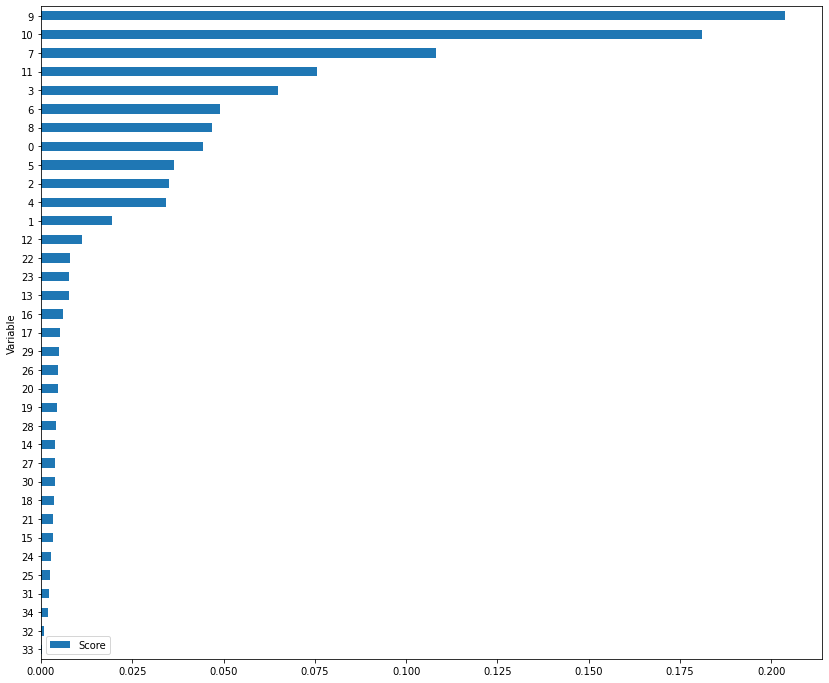

In [978]:
# vamos a hacer un grafico, con esa informacion, puedes estudiarlo
importancia = pd.DataFrame()
importancia['Variable'] = pd.DataFrame(X_test).columns
importancia['Score'] = model.feature_importances_
importancia.sort_values(by = 'Score', ascending=True).plot(x='Variable',
                                                           y='Score',
                                                           kind='barh',
                                                           figsize=(14,12))
plt.show()

In [979]:
etiq = dict(zip(X.columns, model.feature_importances_))

orden = sorted(etiq.items(), key=lambda X: X[1], reverse=True)

pd.DataFrame(orden, columns=['Etiqueta', 'Importancia'])

,Etiqueta,Importancia
0,Months_Inactive_12_mon,0.203753
1,Contacts_Count_12_mon,0.181131
2,Months_on_book,0.108239
3,Credit_Limit,0.075610
4,Education_Level,0.064817
5,Card_Category,0.049068
6,Total_Relationship_Count,0.046910
7,Customer_Age,0.044272
8,Income_Category,0.036487
9,Dependent_count,0.035084


In [980]:
xgb = XGBClassifier( )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [981]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.95260663507109


In [982]:
xgb = xgb.predict(X_test)

In [983]:
print(classification_report(y_test,xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2113
           1       0.89      0.81      0.85       419

    accuracy                           0.95      2532
   macro avg       0.93      0.90      0.91      2532
weighted avg       0.95      0.95      0.95      2532



# Matriz de Confusion

Como se dividide mis predicciones.

<Figure size 432x288 with 0 Axes>

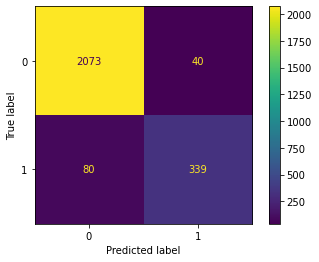

In [984]:
cm = confusion_matrix(y_test,xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()

In [985]:
round((2073+339)/(2074+339+40+80),2)

0.95

In [986]:
339/(2074+339+40+80)*100

13.383339913146466

In [987]:
df.sample(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
4441,826261008,1,48,F,3,Graduate,Unknown,Less than $40K,Blue,44,3,3,2,1438.3,0,1438.3,2054,46,0.0


In [988]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [989]:
pd.DataFrame(xgb).value_counts()

0    2153
1     379
dtype: int64

# Salvar el Modelo

In [990]:
import pickle

In [991]:
#variable para salvar el modelo
model_bank = 'model.sav'
pickle.dump(xgb,open(model_bank,'wb'))

# Para mas profunidad 

## Redes Neuronales 

In [992]:
input_shape = X_train.shape[1]
input_shape

35

In [1002]:
# Sequential model
model = Sequential()

In [1003]:
# First hidden layer
model.add(Dense(35, # How many neurons you have in your first hidden layer.
                input_dim = input_shape, activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(25, # How many neurons you have in your second hidden layer
                activation = 'relu',kernel_regularizer=l2(0.01))) # What activation function are you using?, Usamos el l2 desde la 3ra capa oculta
model.add(Dense(15, # How many neurons you have in your second hidden layer
                activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dense(25, # How many neurons you have in your second hidden layer 
               activation = 'relu',kernel_regularizer=l2(0.01))) # What activation function are you using?

In [1004]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [1005]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ["accuracy"])

In [1006]:
# Step 3: Fit our model
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=150, callbacks = [early_stopping])

Epoch 1/150
238/238 [==============================] - 2s 4ms/step - loss: 0.7240 - accuracy: 0.8614 - val_loss: 0.4804 - val_accuracy: 0.8788
Epoch 2/150
238/238 [==============================] - 1s 5ms/step - loss: 0.3768 - accuracy: 0.8964 - val_loss: 0.3430 - val_accuracy: 0.9013
Epoch 3/150
238/238 [==============================] - 1s 4ms/step - loss: 0.2989 - accuracy: 0.9103 - val_loss: 0.3071 - val_accuracy: 0.9052
Epoch 4/150
238/238 [==============================] - 1s 4ms/step - loss: 0.2691 - accuracy: 0.9130 - val_loss: 0.2880 - val_accuracy: 0.9056
Epoch 5/150
238/238 [==============================] - 1s 4ms/step - loss: 0.2523 - accuracy: 0.9201 - val_loss: 0.2697 - val_accuracy: 0.9115
Epoch 6/150
238/238 [==============================] - 1s 4ms/step - loss: 0.2396 - accuracy: 0.9247 - val_loss: 0.2647 - val_accuracy: 0.9115
Epoch 7/150
238/238 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.9243 - val_loss: 0.2528 - val_accuracy: 0.9147

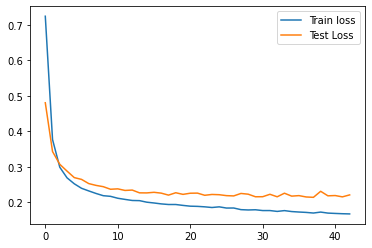

In [1007]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();


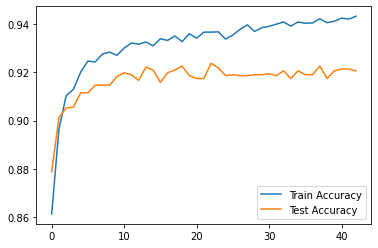

In [1008]:
# Visualize the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend();

# Metricas del Modelo

In [1009]:
predictions = model.predict(X_test)
predictions = np.round(predictions)
print(classification_report(y_test,predictions))

80/80 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2113
           1       0.76      0.76      0.76       419

    accuracy                           0.92      2532
   macro avg       0.86      0.85      0.86      2532
weighted avg       0.92      0.92      0.92      2532



In [1010]:
print(confusion_matrix(y_test,predictions))

[[2014   99]
 [ 102  317]]
